In [67]:
# import modules
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import string
import re
import nltk
import sys
import os
import gensim

# Add the src directory to sys.path
sys.path.append(os.path.abspath(r'C:\dev\NLP2RE_Sandbox\src'))


print(sys.version)
print(sys.executable)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\python.exe


In [68]:
# Specify the path to your XML file and namespace
xml_file_path = r'C:\dev\NLP2RE_Sandbox\data\work_data\2007-ertms.xml'
namespace = {'ns': 'req_document.xsd'}

In [69]:
# Parse .xml to df
from Utils import parse_xml

# import utils.ParseXML as ParseXML
df = parse_xml.process_xml_with_namespace(xml_file_path, namespace)
df.tail(10)

,tag,text,id,path
621,meaning,Transmission of ETCS information from a train ...,,req_document/p/glossary/glossary_item/meaning
622,term,Train trip,,req_document/p/glossary/glossary_item/term
623,meaning,"Is used when a train passes a ""danger"" signal,...",,req_document/p/glossary/glossary_item/meaning
624,term,Warning,,req_document/p/glossary/glossary_item/term
625,meaning,Audible and/or visual indication to alert the ...,,req_document/p/glossary/glossary_item/meaning
626,term,Wheelslip,,req_document/p/glossary/glossary_item/term
627,meaning,When a traction-driven wheel loses adhesion wi...,,req_document/p/glossary/glossary_item/meaning
628,term,Wheelslide,,req_document/p/glossary/glossary_item/term
629,meaning,When a braked wheel loses adhesion with the ra...,,req_document/p/glossary/glossary_item/meaning
630,title,Other technical functions,11,req_document/p/title


In [70]:
# Create 'text_clean' attribute in df (list of tokens)
from Utils import clean_data

df['text_clean'] = df['text'].apply(lambda x: clean_data.preprocess_data_str(x))

df.head()

,tag,text,id,path,text_clean
0,title,ERTMS/ETCS Functional Requirements Specificati...,,req_document/title,"[ertm, etc, function, requir, specif, fr]"
1,version,5.00,,req_document/version,"[5, 00]"
2,issue_date,2007-06-21,,req_document/issue_date,"[2007, 06, 21]"
3,file_number,ERA/ERTMS/003204,,req_document/file_number,"[era, ertm, 003204]"
4,change_date,2007-06-21,,req_document/change_log/change_log_item/change...,"[2007, 06, 21]"


In [71]:
# Create a corpus
# clean_text = clean_data.df_tokenize(df['text_clean'], 2)
clean_text = df['text_clean']


In [72]:
 # Create a Dictionary: Associate each word in the corpus with a unique integer ID
from gensim import corpora

dictionary = corpora.Dictionary(clean_text)

In [73]:
# Convert document into the bag-of-words (BoW) format

corpus = [dictionary.doc2bow(text) for text in clean_text]

In [74]:
num_topics = 60

In [75]:
# Train the model on the corpus.
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
topics = lda_model.print_topics()

# Print topics with words instead of IDs
for topic in topics:
    print(topic)

(20, '0.064*"train" + 0.058*"the" + 0.035*"a" + 0.032*"to" + 0.032*"" + 0.027*"of" + 0.019*"be" + 0.018*"or" + 0.018*"from" + 0.018*"inform"')
(28, '0.002*"equipmen" + 0.002*"overrid" + 0.002*"assess" + 0.002*"foreseen" + 0.002*"hour" + 0.002*"need" + 0.002*"retent" + 0.002*"veri" + 0.002*"week" + 0.002*"24"')
(5, '0.106*"the" + 0.042*"" + 0.037*"driver" + 0.035*"to" + 0.032*"shall" + 0.026*"be" + 0.023*"etc" + 0.021*"system" + 0.018*"data" + 0.018*"inform"')
(57, '0.069*"the" + 0.043*"train" + 0.038*"be" + 0.034*"to" + 0.031*"shall" + 0.025*"" + 0.025*"or" + 0.022*"equip" + 0.021*"level" + 0.021*"ertm"')
(17, '0.006*"shunt" + 0.006*"for" + 0.006*"movement" + 0.005*"signal" + 0.005*"are" + 0.004*"in" + 0.004*"valid" + 0.004*"some" + 0.004*"case" + 0.004*"train"')
(11, '0.070*"to" + 0.052*"train" + 0.048*"" + 0.033*"for" + 0.029*"the" + 0.027*"and" + 0.025*"a" + 0.023*"is" + 0.022*"etc" + 0.016*"shall"')
(54, '0.002*"equipmen" + 0.002*"overrid" + 0.002*"assess" + 0.002*"foreseen" + 0.00

In [76]:
# Get the topic distributions for each document
corpus_lda = lda_model[corpus]


In [77]:
from gensim import corpora, models, similarities
from gensim.models import LsiModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


# Create a matrix where each row will correspond to the topic distribution of a document
topic_matrix = []
for doc in corpus_lda:
    # Convert the topic distribution to a dense vector
    vector = [0] * lda_model.num_topics
    for topic, value in doc:
        vector[topic] = value        
    topic_matrix.append(vector)
print("\n topic_matrix")    

# Convert list to numpy array for easy computation
topic_matrix = np.array(topic_matrix)
print(topic_matrix)    



 topic_matrix
[[0.         0.         0.         ... 0.         0.         0.85952049]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.01666667 0.01666667 0.01666667 ... 0.01666667 0.01666667 0.01666667]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [78]:
# Compute cosine similarity between all pairs of documents
similarity_matrix = cosine_similarity(topic_matrix)
print(similarity_matrix)

[[1.         0.         0.         ... 0.12909944 0.         0.        ]
 [0.         1.         0.         ... 0.12909944 0.         0.        ]
 [0.         0.         1.         ... 0.12909944 0.         0.        ]
 ...
 [0.12909944 0.12909944 0.12909944 ... 1.         0.12909944 0.12909944]
 [0.         0.         0.         ... 0.12909944 1.         0.        ]
 [0.         0.         0.         ... 0.12909944 0.         1.        ]]


## Analyze the Distance
### Measures the cosine distance between topics, with higher distance indicating more distinct topics.

Now you can analyze the distances (or similarities) between the topic distributions:

The similarity_matrix will give you the pairwise cosine similarities between the documents based on their LDA topic distributions. You can convert these similarities into distances if needed (e.g., distance = 1 - similarity).

This process allows you to calculate and analyze the LDA topic distances using Gensim in Python.

In [79]:
# Convert the similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix

# Output the distance matrix
print("Distance Matrix for documents:")
print(distance_matrix)

Distance Matrix for documents:
[[ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  8.70900555e-01
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ...  8.70900555e-01
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00 ...  8.70900555e-01
   1.00000000e+00  1.00000000e+00]
 ...
 [ 8.70900555e-01  8.70900555e-01  8.70900555e-01 ... -1.33226763e-15
   8.70900555e-01  8.70900555e-01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  8.70900555e-01
   0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  8.70900555e-01
   1.00000000e+00  0.00000000e+00]]


# Inter-topic Distance Visualization

Creating inter-topic distance maps helps in visualizing the distance between topics. This can be done using tools like t-SNE (t-distributed Stochastic Neighbor Embedding) or multidimensional scaling (MDS) to project high-dimensional topic vectors into a 2D or 3D space. A well-separated set of topics indicates that the LDA model has generated distinct topics.


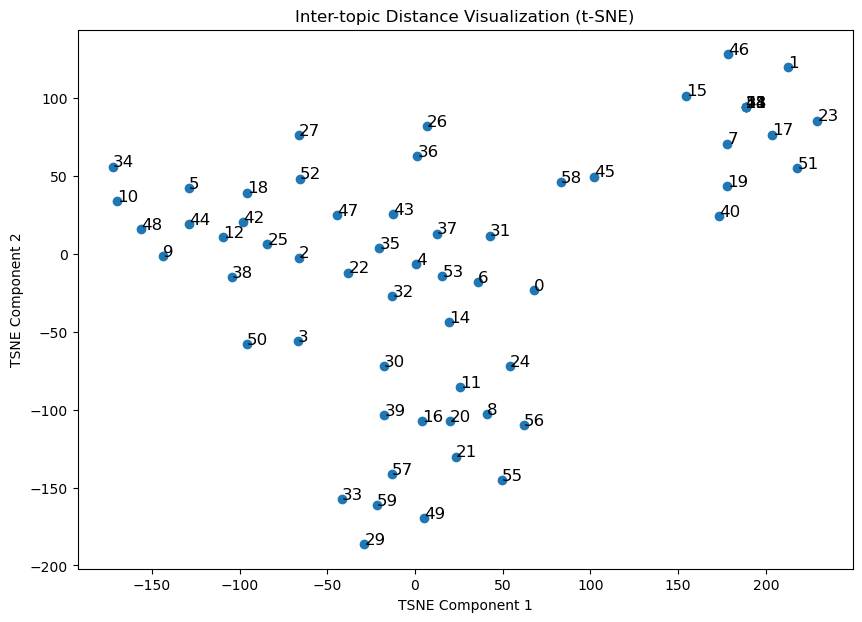

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim import corpora
from gensim.models import LdaModel
from sklearn.metrics.pairwise import cosine_distances

# Assuming lda_model and dictionary have already been created

# Extract topic vectors
topic_vectors = []
for topic_id in range(lda_model.num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=len(dictionary))
    topic_vector = np.zeros(len(dictionary))
    for term_id, value in topic_terms:
        topic_vector[term_id] = value
    topic_vectors.append(topic_vector)

topic_vectors = np.array(topic_vectors)

# Compute pairwise cosine distances
topic_distance_matrix = cosine_distances(topic_vectors)

# Visualize the distances indirectly using t-SNE embeddings
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_embedding = tsne.fit_transform(topic_vectors)

# Compute pairwise distances between t-SNE embeddings
tsne_distance_matrix = cosine_distances(tsne_embedding)

# Plot t-SNE embeddings with distances based on transformed coordinates
plt.figure(figsize=(10, 7))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1])

for i, (x, y) in enumerate(tsne_embedding):
    plt.text(x, y, str(i), fontsize=12)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('Inter-topic Distance Visualization (t-SNE)')
plt.show()



## Average Topic Coherence:
Topic coherence measures the semantic similarity between the high-probability words in a topic. By computing the pairwise distances (e.g., cosine distance) between the word vectors in a topic, you can assess how coherent each topic is. Topics with high coherence scores indicate that the words within the topic are closely related in meaning, which suggests a well-performing LDA model.

To compute topic coherence scores in Python, particularly using Gensim, you can follow these steps. 

1. Extract Topic Terms: Retrieve the top words for each topic from the LDA model.
2. Build Word Embeddings: Use a pre-trained word embedding model (like Word2Vec or FastText) to represent each word as a dense vector.
3. Compute Pairwise Word Similarities: Calculate pairwise similarities (e.g., cosine similarity) between all word vectors within each topic.
4. Aggregate and Compute Coherence Score: Average these pairwise similarities to get a coherence score for each topic. Higher scores indicate more coherent topics.


In [89]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming you have already trained an LDA model and have a dictionary

# Step 1: Extract topic terms from LDA model
def get_topic_terms(lda_model, num_words=10):
    topic_terms = []
    for topic_id in range(lda_model.num_topics):
        topic_terms.append([term for term, _ in lda_model.show_topic(topic_id, topn=num_words)])
    return topic_terms

# Step 2: Load or train a Word2Vec model on your corpus
# Example of training a Word2Vec model (replace with your actual corpus)
# Ensure that `clean_text` is a list of tokenized sentences
sentences = clean_text  # Assuming `clean_text` is already tokenized

word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

# Step 3: Compute pairwise cosine similarities between words in each topic
def compute_topic_coherence(topic_terms, word2vec_model):
    coherence_scores = []
    for topic in topic_terms:
        topic_embeddings = [word2vec_model.wv[word] for word in topic if word in word2vec_model.wv]
        if len(topic_embeddings) > 1:
            pairwise_cosine_similarities = cosine_similarity(topic_embeddings)
            average_similarity = np.mean(pairwise_cosine_similarities[np.triu_indices(len(topic_embeddings), k=1)])
            coherence_scores.append(average_similarity)
        else:
            coherence_scores.append(0)  # If topic has only one word, coherence score is 0
    return coherence_scores

# Step 4: Calculate coherence scores for each topic
topic_terms = get_topic_terms(lda_model, num_words=10)
coherence_scores = compute_topic_coherence(topic_terms, word2vec_model)

# Combine topic indices with their coherence scores
topic_coherence = [(i, score) for i, score in enumerate(coherence_scores)]

# Sort topics by coherence score (ascending order)
topic_coherence_sorted = sorted(topic_coherence, key=lambda x: x[1])

# Set the coherence score threshold
threshold = 0.95

# Print coherence scores for topics below the threshold
for topic_id, score in topic_coherence_sorted:
    if score < threshold:
        print(f"Topic {topic_id}: Coherence Score = {score:.4f}")

Topic 13: Coherence Score = 0.7271
Topic 28: Coherence Score = 0.7271
Topic 41: Coherence Score = 0.7271
Topic 54: Coherence Score = 0.7271
Topic 46: Coherence Score = 0.7723
Topic 26: Coherence Score = 0.8333
Topic 1: Coherence Score = 0.9228
Topic 39: Coherence Score = 0.9324


# Intra-topic Distance:
Evaluating the distance between words within a single topic can also provide insights. Low intra-topic distances suggest that the words within a topic are closely related, indicating a more coherent and meaningful topic.

To evaluate the intra-topic distance for each topic in an LDA model, you can follow these steps:

1. Compute Word Vectors: Use a pre-trained word embedding model (like Word2Vec) to get the vector representations of these words.
2. Calculate Intra-topic Distances: Compute the pairwise distances (e.g., cosine distances) between the word vectors within each topic.
3. Evaluate and Print Intra-topic Distance: Calculate the average distance within each topic and use this to assess topic coherence.


In [97]:
from gensim import corpora
from gensim.models import LdaModel, Word2Vec
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

# Assuming you have already trained an LDA model and have a dictionary

# Step 1: Extract topic terms from LDA model
def get_topic_terms(lda_model, num_words=10):
    topic_terms = []
    for topic_id in range(lda_model.num_topics):
        topic_terms.append([term for term, _ in lda_model.show_topic(topic_id, topn=num_words)])
    return topic_terms

# Step 2: Load or train a Word2Vec model on your corpus
sentences = clean_text  # Assuming `clean_text` is already tokenized
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

# Step 3: Compute intra-topic distances
def compute_intra_topic_distances(topic_terms, word2vec_model):
    intra_topic_distances = []
    for topic in topic_terms:
        topic_embeddings = [word2vec_model.wv[word] for word in topic if word in word2vec_model.wv]
        if len(topic_embeddings) > 1:
            pairwise_cosine_distances = cosine_distances(topic_embeddings)
            average_distance = np.mean(pairwise_cosine_distances[np.triu_indices(len(topic_embeddings), k=1)])
            intra_topic_distances.append(average_distance)
        else:
            intra_topic_distances.append(0)  # If topic has only one word, distance is 0
    return intra_topic_distances

# Step 4: Calculate intra-topic distances for each topic
topic_terms = get_topic_terms(lda_model, num_words=10)
intra_topic_distances = compute_intra_topic_distances(topic_terms, word2vec_model)

# Step 5: Combine topic indices with their distances
topic_distances = [(i, distance) for i, distance in enumerate(intra_topic_distances)]

# Step 6: Sort topics by intra-topic distance (ascending order)
topic_distances_sorted = sorted(topic_distances, key=lambda x: x[1], reverse=True)

# Set the intra-topic distance score threshold
threshold = 0.1

# Print coherence scores for topics below the threshold
for topic_id, score in topic_distances_sorted:
    if score > threshold:
        print(f"Topic {topic_id}: Coherence Score = {score:.4f}")


Topic 13: Coherence Score = 0.2729
Topic 28: Coherence Score = 0.2729
Topic 41: Coherence Score = 0.2729
Topic 54: Coherence Score = 0.2729
Topic 46: Coherence Score = 0.2277
Topic 26: Coherence Score = 0.1667
